# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order  to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.datasets import fetch_openml

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [30]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})


/var/folders/z0/_xm75h915yjdvr3n2f8gh5n40000gn/T/ipykernel_21374/724691471.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes': 1, 'no': 0})


In [32]:
# Determine null values per column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [33]:
# Describe Data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [34]:

# Determine null values per column
df.isnull().sum()



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
category_counts = df['y'].value_counts()
print(category_counts)

y
0    36548
1     4640
Name: count, dtype: int64


In [37]:
# Delete duration column as it highly affects the output target
#df.drop(columns = ['duration'], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

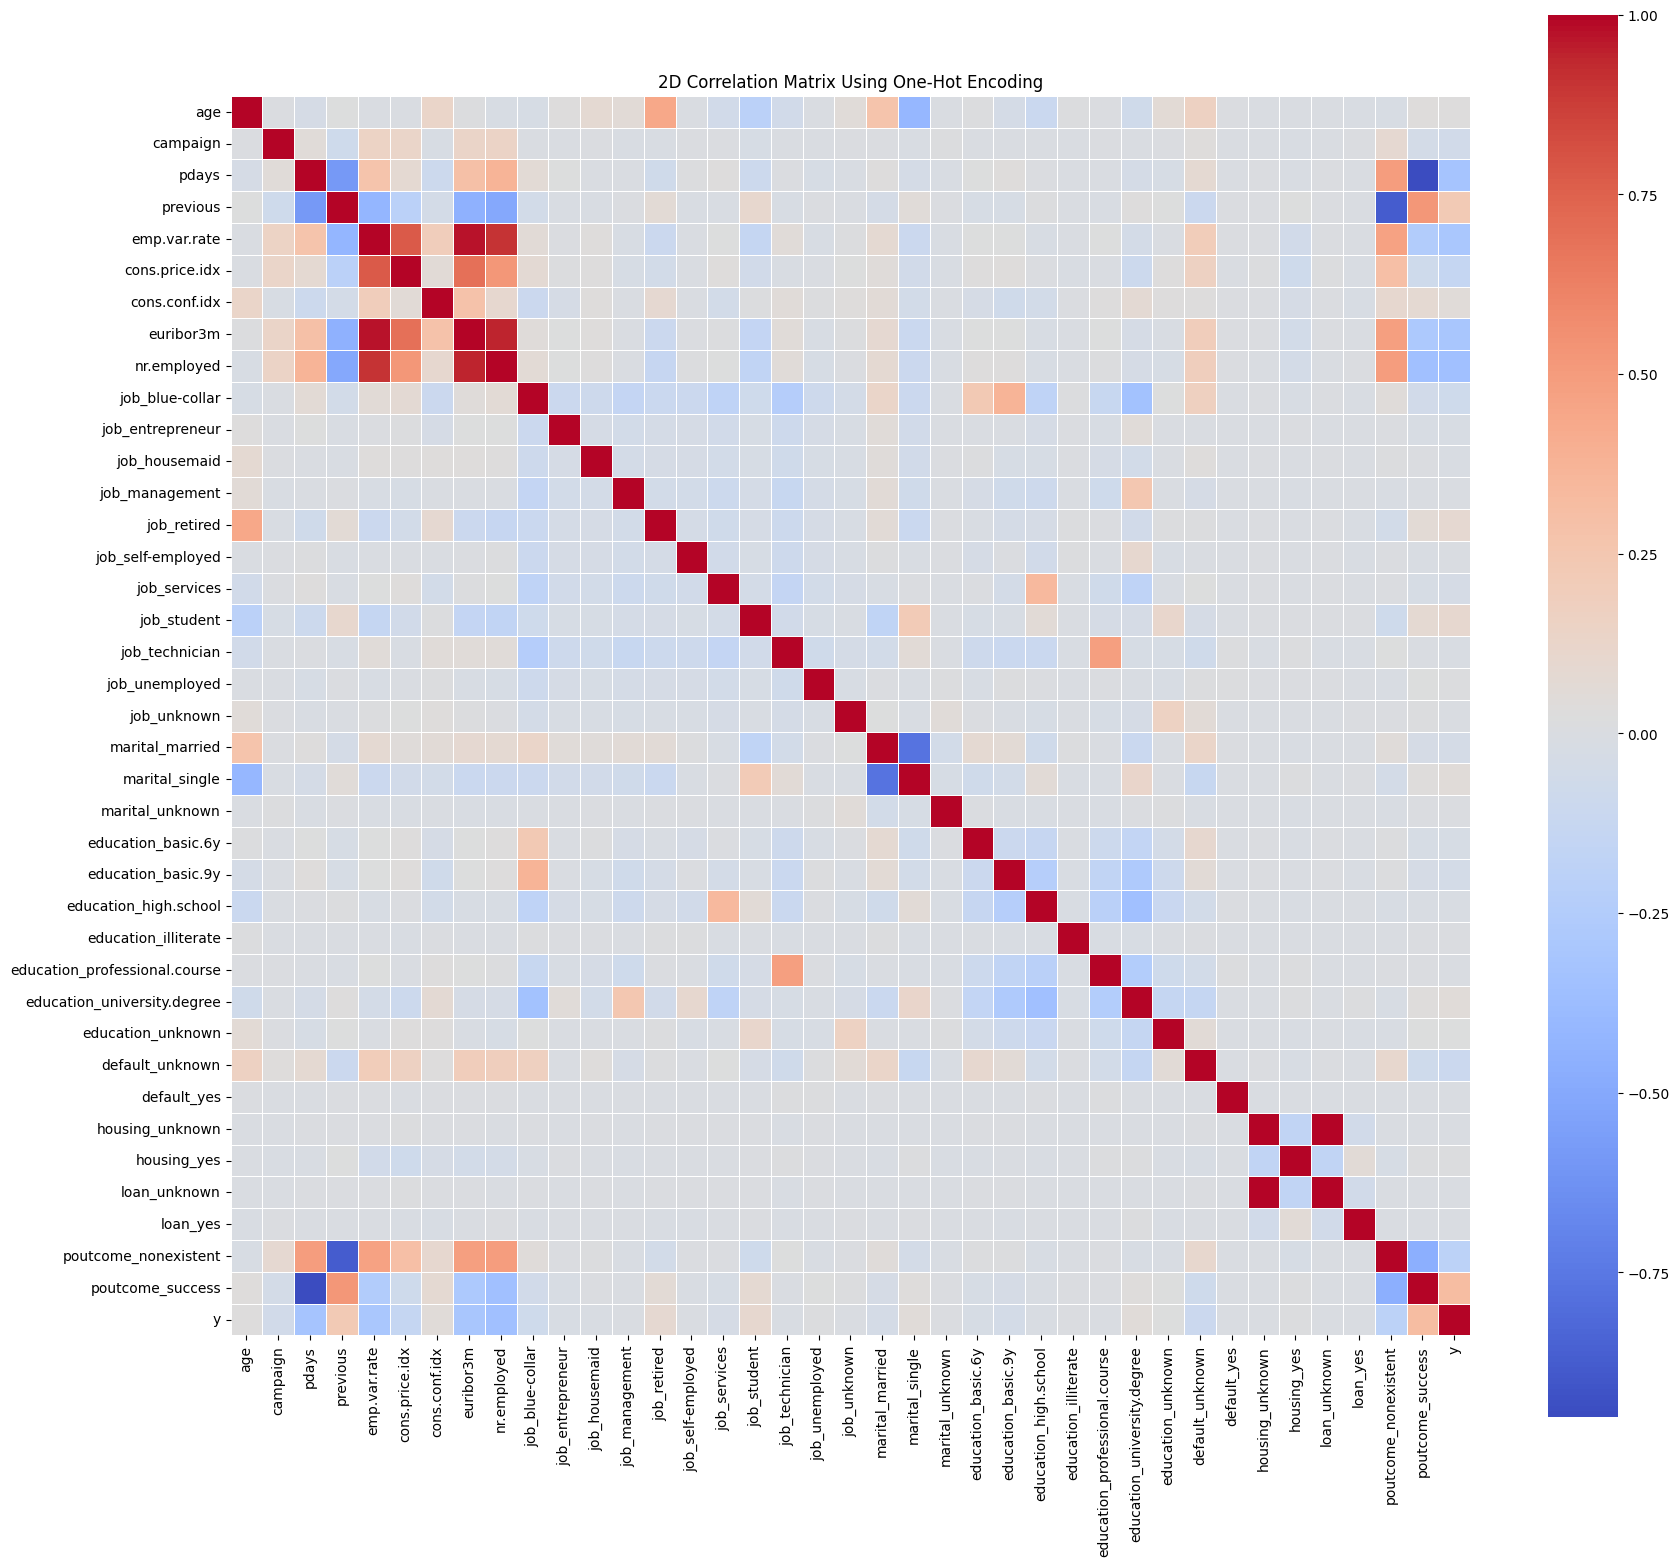

y                                1.000000
poutcome_success                 0.316269
previous                         0.230181
job_student                      0.093955
job_retired                      0.092221
cons.conf.idx                    0.054878
marital_single                   0.054133
education_university.degree      0.050364
age                              0.030399
education_unknown                0.021430
job_unemployed                   0.014752
housing_yes                      0.011743
education_illiterate             0.007246
marital_unknown                  0.005211
education_professional.course    0.001003
job_unknown                     -0.000151
job_management                  -0.000419
loan_unknown                    -0.002270
housing_unknown                 -0.002270
default_yes                     -0.003041
loan_yes                        -0.004466
job_self-employed               -0.004663
job_technician                  -0.006149
job_housemaid                   -0

In [39]:
# Encode columns to generate correlation matrix after data clean up
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical and numerical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

num_cols = ['age', 'campaign', 'pdays', 'previous',
             'emp.var.rate' , 'cons.price.idx' , 'cons.conf.idx', 'euribor3m' , 'nr.employed'
           ]
#cat_cols = X.select_dtypes(include='object').columns
#num_cols = X.select_dtypes(exclude='object').columns

#for col in cat_cols:
#    mean_target = df.groupby(col)['y'].mean()
#    X_encoded[col] = X[col].map(mean_target).fillna(df['y'].mean())


# Apply OneHotEncoding
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(ohe.fit_transform(X[cat_cols]),
                         columns=ohe.get_feature_names_out(cat_cols),
                         index=X.index)

# Combine numeric and encoded features
X_final = pd.concat([X[num_cols], X_encoded], axis=1)

# Add the target variable back
df_encoded = X_final.copy()
df_encoded['y'] = y

# Compute and plot correlation matrix
corr_matrix = df_encoded.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, linewidths=0.5)
plt.title("2D Correlation Matrix Using One-Hot Encoding")
plt.tight_layout()
plt.show()

# Get and sort correlations with 'y'
correlation_with_y = corr_matrix['y'].sort_values(ascending=False)

# Display top and bottom correlations
correlation_with_y



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [40]:
# Remove rows with age < 21
df = df[df['age'] < 21 ]


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 1353 to 41094
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             140 non-null    int64  
 1   job             140 non-null    object 
 2   marital         140 non-null    object 
 3   education       140 non-null    object 
 4   default         140 non-null    object 
 5   housing         140 non-null    object 
 6   loan            140 non-null    object 
 7   contact         140 non-null    object 
 8   month           140 non-null    object 
 9   day_of_week     140 non-null    object 
 10  duration        140 non-null    int64  
 11  campaign        140 non-null    int64  
 12  pdays           140 non-null    int64  
 13  previous        140 non-null    int64  
 14  poutcome        140 non-null    object 
 15  emp.var.rate    140 non-null    float64
 16  cons.price.idx  140 non-null    float64
 17  cons.conf.idx   140 non-null    flo

In [41]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,19.192857,294.750000,2.121429,793.242857,0.707143,-1.870714,93.193050,-39.745714,1.384707,5065.396429,0.407143
std,0.880618,247.830765,1.801150,403.996650,1.076207,1.195044,0.705945,6.980161,1.157990,65.999736,0.493066
min,17.000000,36.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,19.000000,135.000000,1.000000,999.000000,0.000000,-2.900000,92.649000,-47.100000,0.799250,5008.700000,0.000000
50%,19.000000,215.000000,2.000000,999.000000,0.000000,-1.800000,93.075000,-40.000000,0.979500,5076.200000,0.000000
75%,20.000000,387.250000,3.000000,999.000000,1.000000,-1.800000,93.876000,-33.000000,1.405000,5099.100000,1.000000
max,20.000000,1503.000000,15.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,4.962000,5228.100000,1.000000


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [42]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']  # Convert target to binary

# Identify categorical and numerical columns

# Define custom subset of categorical features that excludes Duration column as it greatly this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, cat_cols)
])



In [43]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [44]:
# result store dictionary
results  = {
    "Model": [],
    "Accuracy": [],
    "Precision" : [],
    "Recall": [],
    "F1-score": [],
    "Train Time": [],
    "Inference Time": []
}

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_name = 'LogisticRegression'

# Create pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
start_time = time.time()
logreg_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict and evaluate
start_time = time.time()
y_pred = logreg_pipeline.predict(X_test)
inference_time = time.time() - start_time

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results['Model'].append(model_name)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results["F1-score"].append(f1)
results["Train Time"].append(train_time)
results["Inference Time"].append(inference_time)

print(results)

{'Model': ['LogisticRegression'], 'Accuracy': [0.7857142857142857], 'Precision': [0.75], 'Recall': [0.7058823529411765], 'F1-score': [0.784568372803667], 'Train Time': [0.017820119857788086], 'Inference Time': [0.0031807422637939453]}


In [46]:
#K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
model_name = 'K-Nearest Neighbors'

# Create pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Train model

start_time = time.time()
knn_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict and evaluate
start_time = time.time()
y_pred = knn_pipeline.predict(X_test)
inference_time = time.time() - start_time

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results['Model'].append(model_name)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results["F1-score"].append(f1)
results["Train Time"].append(train_time)
results["Inference Time"].append(inference_time)

print(results)

{'Model': ['LogisticRegression', 'K-Nearest Neighbors'], 'Accuracy': [0.7857142857142857, 0.6428571428571429], 'Precision': [0.75, 0.55], 'Recall': [0.7058823529411765, 0.6470588235294118], 'F1-score': [0.784568372803667, 0.645937731044114], 'Train Time': [0.017820119857788086, 0.03622770309448242], 'Inference Time': [0.0031807422637939453, 0.0315699577331543]}


In [47]:
# c. Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_name = 'Decision Tree'

# Create pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train model
start_time = time.time()
dt_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict and evaluate
start_time = time.time()
y_pred = dt_pipeline.predict(X_test)
inference_time = time.time() - start_time

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results['Model'].append(model_name)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results["F1-score"].append(f1)
results["Train Time"].append(train_time)
results["Inference Time"].append(inference_time)

print(results)


{'Model': ['LogisticRegression', 'K-Nearest Neighbors', 'Decision Tree'], 'Accuracy': [0.7857142857142857, 0.6428571428571429, 0.6666666666666666], 'Precision': [0.75, 0.55, 0.5652173913043478], 'Recall': [0.7058823529411765, 0.6470588235294118, 0.7647058823529411], 'F1-score': [0.784568372803667, 0.645937731044114, 0.668939393939394], 'Train Time': [0.017820119857788086, 0.03622770309448242, 0.048316001892089844], 'Inference Time': [0.0031807422637939453, 0.0315699577331543, 0.004323005676269531]}


In [51]:
# d. Support Vector Machine

from sklearn.tree import DecisionTreeClassifier
import time
from sklearn import metrics
from sklearn.svm import SVC
model_name = 'Support Vector Machine'

# Create pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', random_state=42))  # You can change kernel to 'linear', 'poly', etc.
])

# Train model
start_time = time.time()
svm_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict and evaluate
start_time = time.time()
y_pred = svm_pipeline.predict(X_test)
inference_time = time.time() - start_time

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results['Model'].append(model_name)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results["F1-score"].append(f1)
results["Train Time"].append(train_time)
results["Inference Time"].append(inference_time)

print(results)

{'Model': ['LogisticRegression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine'], 'Accuracy': [0.7857142857142857, 0.6428571428571429, 0.6666666666666666, 0.6666666666666666], 'Precision': [0.75, 0.55, 0.5652173913043478, 0.6363636363636364], 'Recall': [0.7058823529411765, 0.6470588235294118, 0.7647058823529411, 0.4117647058823529], 'F1-score': [0.784568372803667, 0.645937731044114, 0.668939393939394, 0.6488095238095238], 'Train Time': [0.017820119857788086, 0.03622770309448242, 0.048316001892089844, 0.01410818099975586], 'Inference Time': [0.0031807422637939453, 0.0315699577331543, 0.004323005676269531, 0.0030188560485839844]}


### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [52]:
results_df = pd.DataFrame(results)

print(results_df)

                    Model  Accuracy  Precision    Recall  F1-score  \
0      LogisticRegression  0.785714   0.750000  0.705882  0.784568   
1     K-Nearest Neighbors  0.642857   0.550000  0.647059  0.645938   
2           Decision Tree  0.666667   0.565217  0.764706  0.668939   
3  Support Vector Machine  0.666667   0.636364  0.411765  0.648810   

   Train Time  Inference Time  
0    0.017820        0.003181  
1    0.036228        0.031570  
2    0.048316        0.004323  
3    0.014108        0.003019  


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [53]:
# result store dictionary
results_improv  = {
    "Model": [],
    "Accuracy": [],
    "Precision" : [],
    "Recall": [],
    "F1-score": [],
    "Train Time": [],
    "Inference Time": []
}

In [54]:
# Revised Logistic Regression model

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score

model_name = 'LogisticRegression'

# Create pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define parameter grid
param_grid = { 'classifier__C': [0.01, 0.1, 1, 10] }

# Setup GridSearchCV
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train
start_time = time.time()
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Evaluate
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results_improv['Model'].append(model_name)
results_improv['Accuracy'].append(accuracy)
results_improv['Precision'].append(precision)
results_improv['Recall'].append(recall)
results_improv["F1-score"].append(f1)
results_improv["Train Time"].append(train_time)
results_improv["Inference Time"].append(inference_time)


In [55]:
from sklearn.neighbors import KNeighborsClassifier

model_name = 'K-Nearest Neighbors'

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_params = { 'classifier__n_neighbors': [3, 5, 7] }

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
start = time.time()
knn_grid.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = knn_grid.predict(X_test)
inference_time = time.time() - start

# Evaluate
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results_improv['Model'].append(model_name)
results_improv['Accuracy'].append(accuracy)
results_improv['Precision'].append(precision)
results_improv['Recall'].append(recall)
results_improv["F1-score"].append(f1)
results_improv["Train Time"].append(train_time)
results_improv["Inference Time"].append(inference_time)



In [56]:
from sklearn.tree import DecisionTreeClassifier

model_name = 'Decision Tree'

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'classifier__max_depth': [3, 5, 10, None]
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
start = time.time()
dt_grid.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = dt_grid.predict(X_test)
inference_time = time.time() - start

# Evaluate
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results_improv['Model'].append(model_name)
results_improv['Accuracy'].append(accuracy)
results_improv['Precision'].append(precision)
results_improv['Recall'].append(recall)
results_improv["F1-score"].append(f1)
results_improv["Train Time"].append(train_time)
results_improv["Inference Time"].append(inference_time)


In [57]:
from sklearn.svm import SVC

model_name = 'Support Vector Machine'

svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

svc_params = {
    'classifier__C': [0.1, 1, 10]
}

svc_grid = GridSearchCV(svc_pipeline, svc_params, cv=5, scoring='accuracy', n_jobs=-1)
start = time.time()
svc_grid.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = svc_grid.predict(X_test)
inference_time = time.time() - start

# Evaluate
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average="weighted")


results_improv['Model'].append(model_name)
results_improv['Accuracy'].append(accuracy)
results_improv['Precision'].append(precision)
results_improv['Recall'].append(recall)
results_improv["F1-score"].append(f1)
results_improv["Train Time"].append(train_time)
results_improv["Inference Time"].append(inference_time)





In [58]:
results_improv_df = pd.DataFrame(results_improv)



In [59]:
print('Model Accuracy , score and time results without optimization')
print(results_df)

print('Model Accuracy , score and time results with optimization')
print(results_improv_df)


Model Accuracy , score and time results without optimization
                    Model  Accuracy  Precision    Recall  F1-score  \
0      LogisticRegression  0.785714   0.750000  0.705882  0.784568   
1     K-Nearest Neighbors  0.642857   0.550000  0.647059  0.645938   
2           Decision Tree  0.666667   0.565217  0.764706  0.668939   
3  Support Vector Machine  0.666667   0.636364  0.411765  0.648810   

   Train Time  Inference Time  
0    0.017820        0.003181  
1    0.036228        0.031570  
2    0.048316        0.004323  
3    0.014108        0.003019  
Model Accuracy , score and time results with optimization
                    Model  Accuracy  Precision    Recall  F1-score  \
0      LogisticRegression  0.714286   0.619048  0.764706  0.716901   
1     K-Nearest Neighbors  0.642857   0.550000  0.647059  0.645938   
2           Decision Tree  0.642857   0.533333  0.941176  0.629508   
3  Support Vector Machine  0.666667   0.565217  0.764706  0.668939   

   Train Time  Infe

##### Questions